In [1]:
import os
import numpy as np
import pandas as pd

import torch
import torchvision
from torchvision import transforms as T
import xml.etree.cElementTree as ET
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
data = os.path.join('face-mask-detection')
transform =T.Compose([T.ToTensor()])

In [3]:
class mask():

    def __init__(self, data, transform=None):
        self.img_dir = os.path.join(data, 'images')
        self.ann_dir = os.path.join(data, 'annotations')
        self.images = list(sorted(os.listdir(self.img_dir)))
        self.annotations = list(sorted(os.listdir(self.ann_dir)))
        self.transform = transform


    def __get_target__(self, x):
        file_path = os.path.join(self.ann_dir, self.annotations[x])
        tree = ET.parse(file_path)
        root = tree.getroot()
        target = []

        for boxes in root.iter('object'):
            x_min, y_min, x_max, y_max = None, None, None, None
            
            x_min = int(boxes.find('bndbox/xmin').text)
            y_min = int(boxes.find('bndbox/ymin').text)
            x_max = int(boxes.find('bndbox/xmax').text)
            y_max = int(boxes.find('bndbox/ymax').text)
            label = boxes.find('name').text
            if label == 'with_mask':
                label == 0
            elif label == 'without_mask':
                label == 1
            else:
                label == 2
                target.append([x_min, y_min, x_max, y_max, label])
        return np.array(target)


    def __len__(self):
        return len(self.images)

    
    def __getitem__(self, x):
        img_path = os.path.join(self)
        img = Image.open(img_path).convert('RGB')
        target = self.__get_target__(x)
        boxes = target[:, -1]
        label = target[:, -1]

        target = dict()
        target['boxes'] = torch.as_tensor(boxes)
        target['label'] = torch.tensor(label)
        target['image_id'] = torch.tensor([x])
        target['crowd'] = torch.zeros((len(self.images)), dtype = torch.int64)
        target['area'] = torch.tensor((boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]))
        if self.transform is not None:
            img = self.transform(img)

        return img, target
 



In [4]:
dataset = mask(data, transform)

TypeError: expected str, bytes or os.PathLike object, not mask

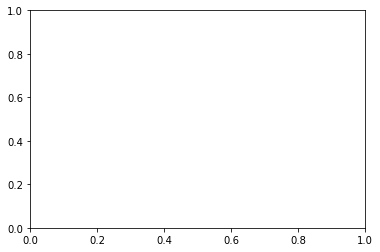

In [7]:
fig, ax = plt.subplots()
img,targets = dataset[625]
img = img.numpy()
boxes = targets['boxes']
labels = targets['labels']
img = np.moveaxis(img, 0, -1)
fig = plt.imshow(img)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
i = 0
for box in boxes:
    clr = ''
    if labels[i] == 0:
        clr = 'g'
    elif labels[i] == 1:
        clr = 'r'
    else:
        clr = 'o'
    i += 1
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                             linewidth=2, edgecolor=clr, facecolor='none')
    ax.add_patch(rect)

TypeError: expected str, bytes or os.PathLike object, not mask

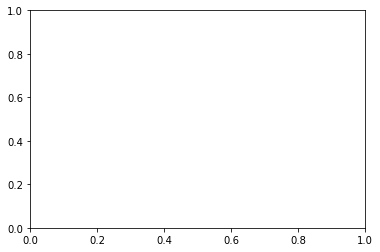

In [6]:
fig, ax = plt.subplots()
img, targets = dataset[625]
img = img.numpy()
boxes = targets['boxes']
labels = targets['labels']
img = np.moveaxis(img, 0, -1)
fig = plt.imshow(img)
ax.axaxis.set_visible(False)
ax.ayaxis.set_visible(False)
i = 0
for box in boxes:
    clr = ''
    if labels[i] == 0:
        clr = 'g'
    elif labels[i] == 1:
        clr = 'r'
    else:
        clr = 'o'
    i += 1
    rect = patches.Rectangle((box[0, box[1]]), box[2] - box[0], box[3] - box[1], lw=2, edgecolor=clr, facecolor='none')
    ax.add_patch(rect)